In [6]:
from Framework.objectDetection import load_model, detect
from Framework.planogramMatching import match
from Framework.outputDisplay import display

from PIL import Image
import pandas as pd
import numpy as np
import random

In [7]:
store_number = 1
image_number = 15
img_path = f'shelf_image/s{store_number}_{image_number}.jpg'
img = Image.open(img_path).convert('RGB') 
planogram = pd.read_csv(f'Planogram Dataset/annotations/s{store_number}_{image_number}.csv', names=['class','xmin','ymin','xmax','ymax'])

In [8]:
model = load_model()
prediction = detect(model, img)

Using cache found in /Users/neufii/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-8-13 Python-3.10.8 torch-2.0.1 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7584586 parameters, 0 gradients, 17.6 GFLOPs
Adding AutoShape... 


In [9]:
# mockup prediction because of poor performance of the model
img_width, img_height = img.size
x_shift = img_width*0.025
y_shift = img_height*0.025

prediction = pd.DataFrame()
prediction['name'] = [x.split('/')[1] +'/'+ x.split('/')[2][:-4] if len(x.split('/')) == 3 else x.split('/')[2] +'/'+ x.split('/')[3][:-4] for x in planogram['class']]
prediction['xmin'] = planogram['xmin'] + np.random.randint(-x_shift, x_shift, planogram.shape[0])
prediction['xmax'] = ((planogram['xmax'] - planogram['xmin']) + np.random.randint(-x_shift, x_shift, planogram.shape[0])) + prediction['xmin']
prediction['ymin'] = planogram['ymin'] + np.random.randint(-y_shift, y_shift, planogram.shape[0])
prediction['ymax'] = ((planogram['ymax'] - planogram['ymin']) + np.random.randint(-x_shift, x_shift, planogram.shape[0])) + prediction['ymin']

number_of_products_to_remove = random.randint(0, 3) # max 3 missing products
products_to_be_removed_list = random.sample(range(0, planogram.shape[0]-1), number_of_products_to_remove)

prediction.drop(products_to_be_removed_list, inplace=True) #randomly remove products
product_to_change_name = random.randint(0,prediction.shape[0]-1)
prediction.loc[product_to_change_name, 'name'] = prediction.iloc[0]['name']

prediction = prediction.sample(frac=1).reset_index(drop=True) #random order of mockup detection

In [10]:
result = display(match(prediction, planogram), img)

In [13]:
result['missing_products']

['Rice/20', 'Rice/11', 'Rice/14', 'Rice/11', 'Rice/21']

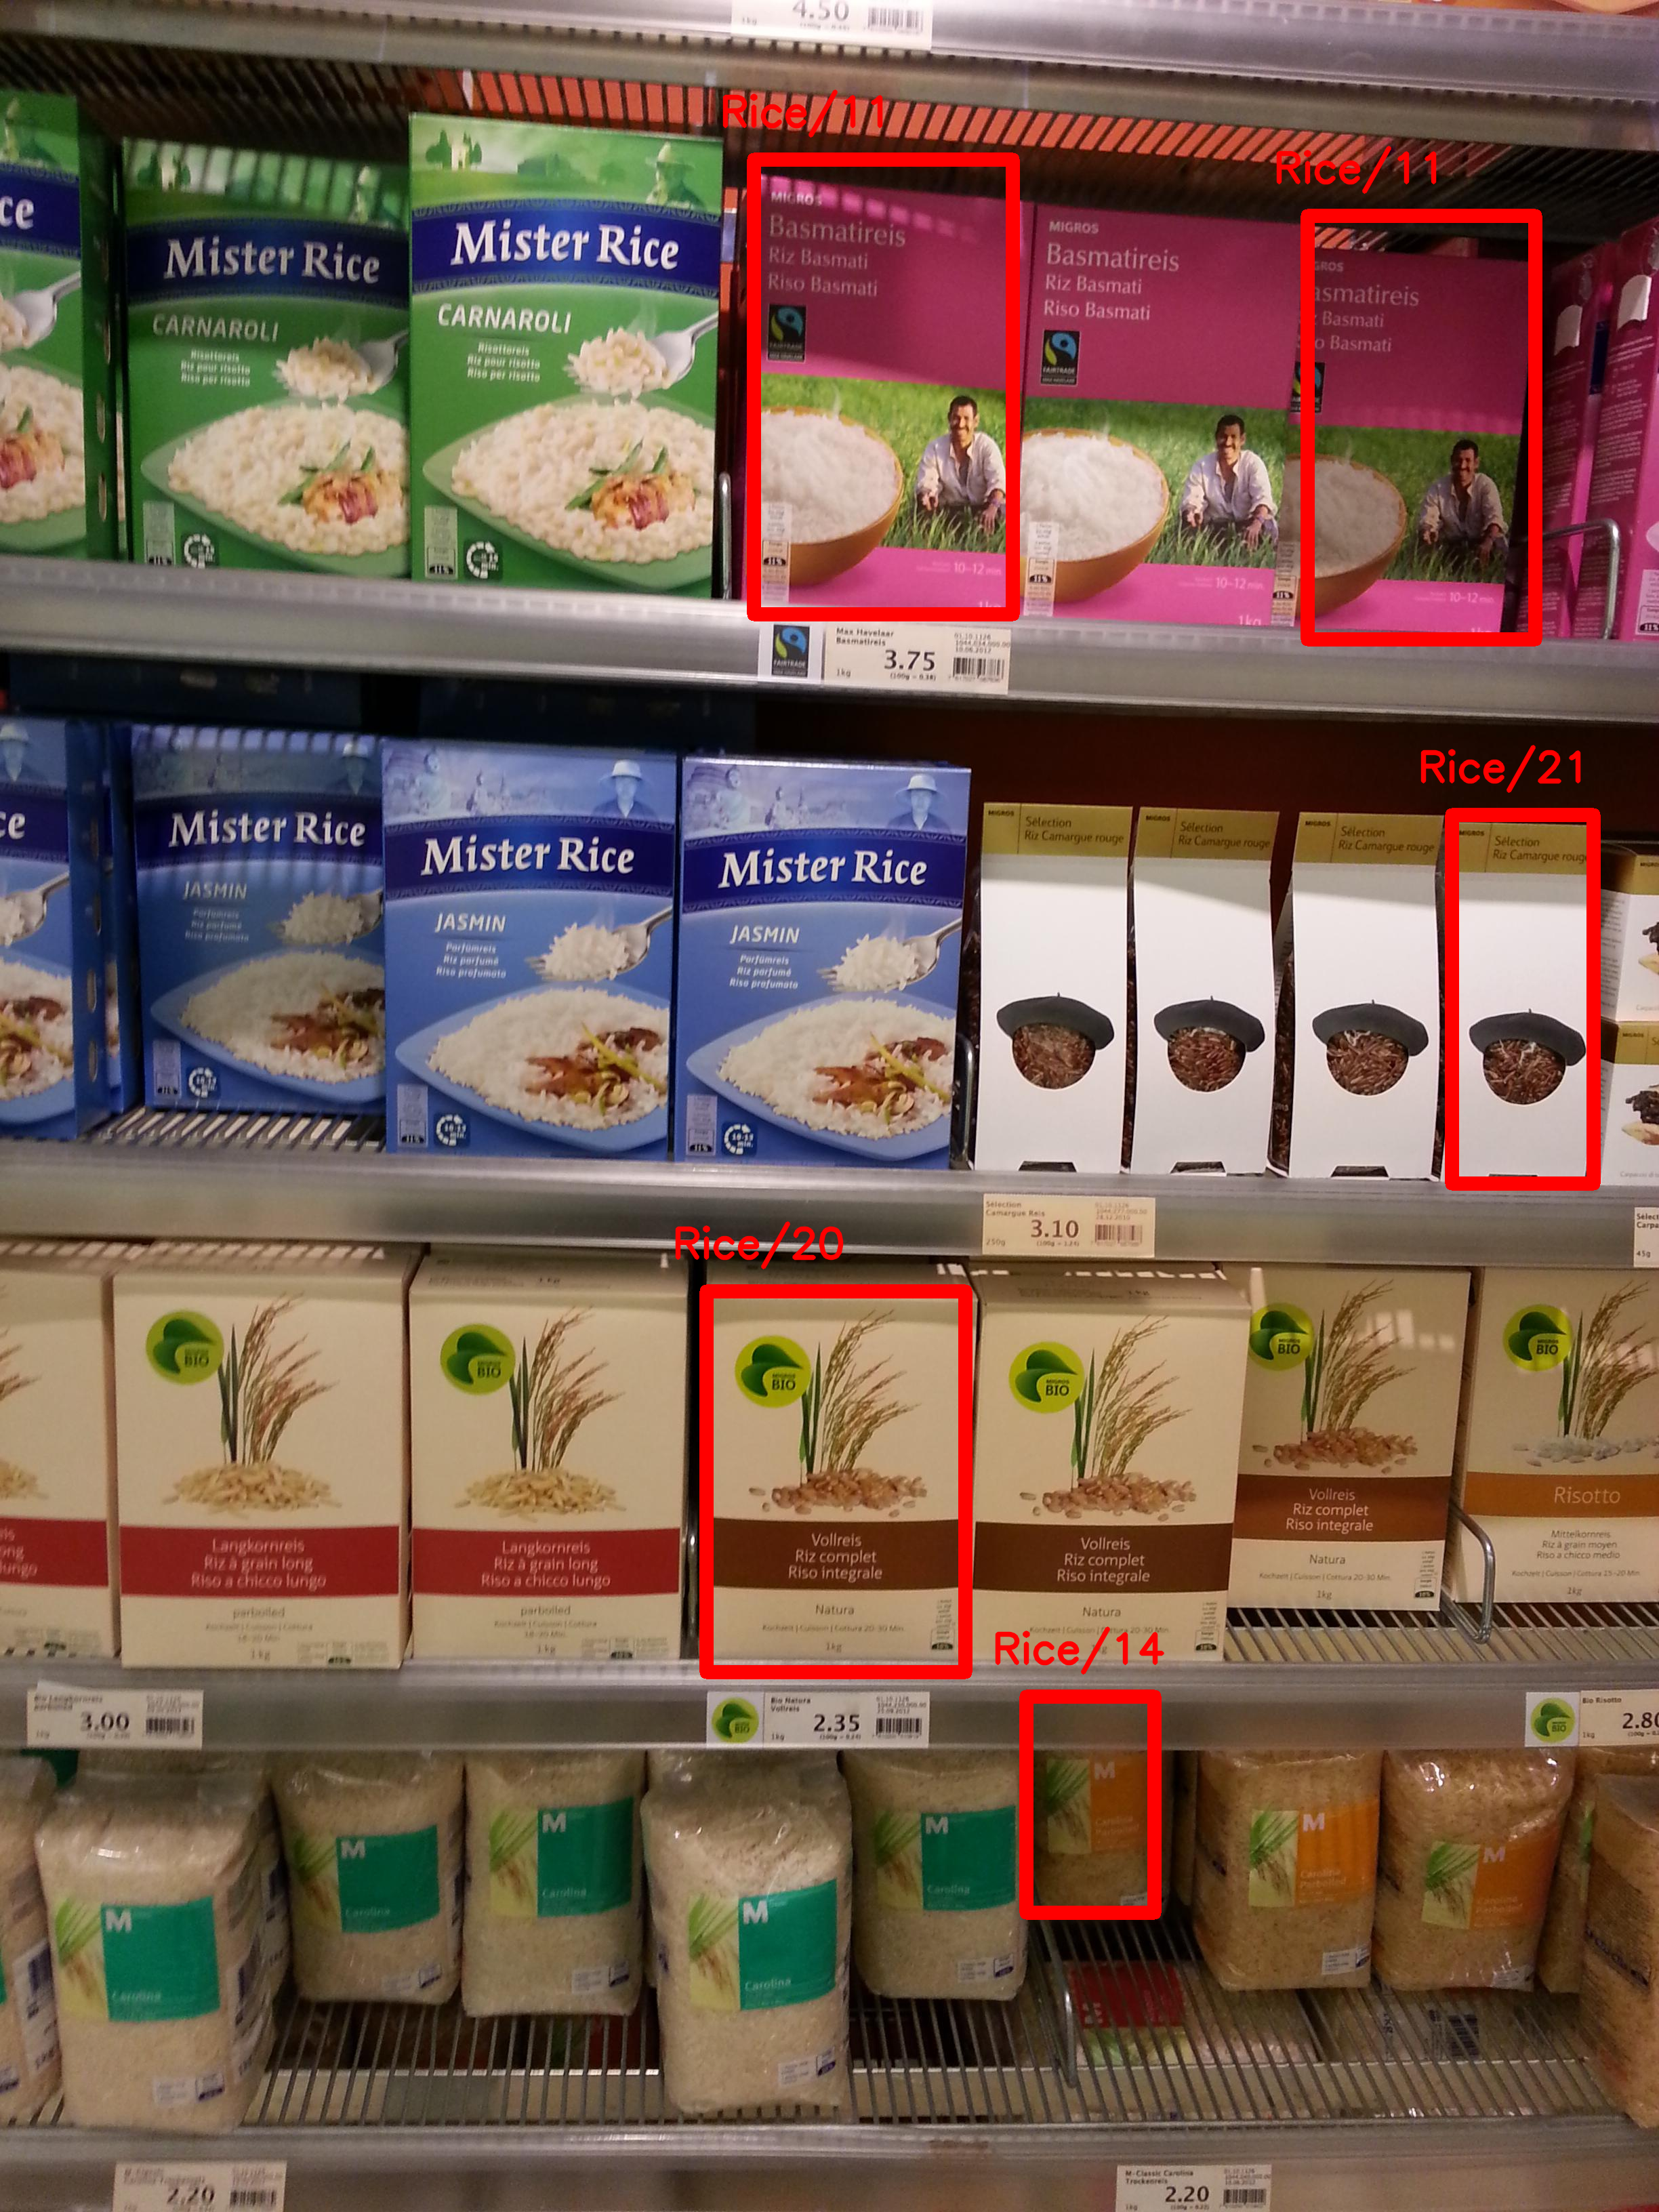

In [11]:
result['img']